# Radial Velocity Analysis

Since we now have extracted the spectrum from each of the science frame, we want to find the position of the spectral lines in each of the spectrum in order to compute the radial velocities.

## Position of Spectral features

We now want to find the position of the prominent spectral features in the flat corrected spectrum. The idea is to fit the Gaussian to the spectral line and thus finding the position of the line. That is a tricky procedure in the sense that, we first want to specify the location of the spectral line manually and then extract the data for only that region, and finally fitting Gaussian to that data. To make this process a little bit simpler we wrote a python script that uses the `SpanSelector` function from `matplotlib.widgets` to let user specify the location of as many lines user wants and fit Gaussian to each of them. Later, this script would save the position of each of the lines (in pixel space though) in sperate file. That file would have position of specified lines in each of the frames. Below, we can use this information to plot the position of line with time.

In the following figure, you would see the position of the four of the lines in each frames.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from astropy.io import fits
from scipy.optimize import curve_fit as cft
from scipy.optimize import minimize as mz
import os
import utils as utl

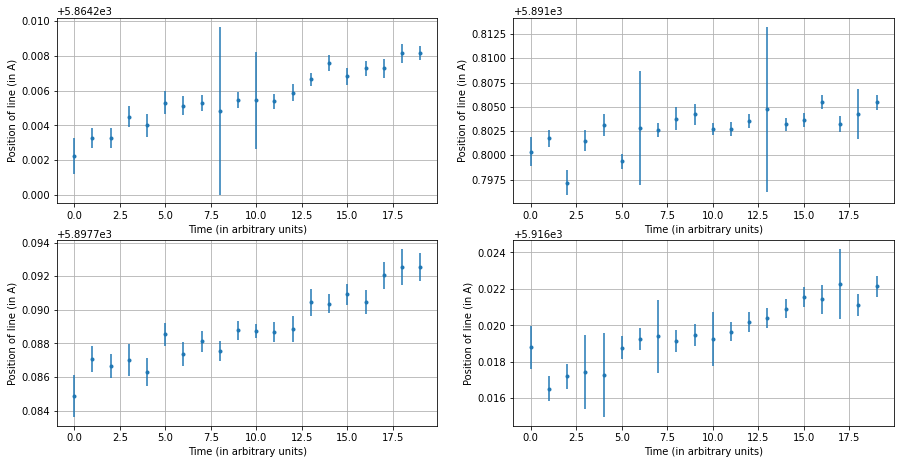

In [2]:
pos1, pos2, pos3, pos4 = np.loadtxt(os.getcwd() + '/Results/Line_pos.dat', usecols=(0,1,2,3), unpack=True)
pos1_var, pos2_var, pos3_var, pos4_var = np.loadtxt(os.getcwd() + '/Results/Line_pos_err.dat', usecols=(0,1,2,3), unpack=True)
pos1_err, pos2_err, pos3_err, pos4_err = np.sqrt(pos1_var), np.sqrt(pos2_var), np.sqrt(pos3_var), np.sqrt(pos4_var)

fig0, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 7.5))
axs[0,0].errorbar(np.arange(len(pos1)), pos1, yerr=pos1_err, fmt='.')
axs[0,0].set_xlabel('Time (in arbitrary units)')
axs[0,0].set_ylabel('Position of line (in A)')
axs[0,0].grid()
axs[0,1].errorbar(np.arange(len(pos2)), pos2, yerr=pos2_err, fmt='.')
axs[0,1].set_xlabel('Time (in arbitrary units)')
axs[0,1].set_ylabel('Position of line (in A)')
axs[0,1].grid()
axs[1,0].errorbar(np.arange(len(pos3)), pos3, yerr=pos3_err, fmt='.')
axs[1,0].set_xlabel('Time (in arbitrary units)')
axs[1,0].set_ylabel('Position of line (in A)')
axs[1,0].grid()
axs[1,1].errorbar(np.arange(len(pos4)), pos4, yerr=pos4_err, fmt='.')
axs[1,1].set_xlabel('Time (in arbitrary units)')
axs[1,1].set_ylabel('Position of line (in A)')
axs[1,1].grid()

## Finding Radial Velocity of the target using Na-doublet

The rest frame wavelengths of the Sodium doublet lines are 5891.583264 A and 5897.558147 A. And we have measured the wavelengths of these two lines from the spectrum (which would be different from their rest-frame values). Using the Doppler shift formula,

$$\frac{\delta \lambda}{\lambda} = \frac{v}{c}$$

we can calculate the radial valocities. We shall first calculate the RVs from both of these lines and then find the mean values from them. After calculateing RVs, we want to correct them for barycentric velocities which were given in one of the dataset, and being use directly here.

In [3]:
bery = np.loadtxt('berv.dat', usecols=1, unpack=True)

In [4]:
rv1 = np.array([])
rv1_err = np.array([])

rv2 = np.array([])
rv2_err = np.array([])

lam1 = 5891.583264
lam2 = 5897.558147

for i in range(len(pos2)):
    # For first line
    lam_n = np.random.normal(pos2[i], pos2_err[i], 10000)
    diff1 = (lam_n - lam1)/lam1
    rvn1 = (diff1*299792458) + (bery[i]*1000)
    rv1 = np.hstack((rv1, np.mean(rvn1)))
    rv1_err = np.hstack((rv1_err, np.std(rvn1)))
    # For second line
    lam_m = np.random.normal(pos3[i], pos3_err[i], 10000)
    diff2 = (lam_m - lam2)/lam2
    rvn2 = (diff2*299792458) + (bery[i]*1000)
    rv2 = np.hstack((rv2, np.mean(rvn2)))
    rv2_err = np.hstack((rv2_err, np.std(rvn2)))

rv_avg = np.array([])
rv_avg_err = np.array([])

for i in range(len(rv1)):
    rv11 = np.random.normal(rv1[i], rv1_err[i], 10000)
    rv22 = np.random.normal(rv2[i], rv2_err[i], 10000)
    rv5 = (rv11 + rv22)/2
    rv_avg = np.hstack((rv_avg, np.mean(rv5)))
    rv_avg_err = np.hstack((rv_avg_err, np.std(rv5)))

f1 = open(os.getcwd() + '/Results/rv1.dat', 'w')
f2 = open(os.getcwd() + '/Results/rv2.dat', 'w')
f3 = open(os.getcwd() + '/Results/rv_avg.dat', 'w')

print('Radial Velocities (in m/s)\tError in RV (in m/s)')
print('-----------------------------------------------------')

for i in range(len(rv1)):
    f1.write(str(rv1[i]) + '\t' + str(rv1_err[i]) + '\n')
    f2.write(str(rv2[i]) + '\t' + str(rv2_err[i]) + '\n')
    f3.write(str(rv_avg[i]) + '\t' + str(rv_avg_err[i]) + '\n')
    print(str(rv_avg[i]) + '\t\t' + str(rv_avg_err[i]))

f1.close()
f2.close()
f3.close()

Radial Velocities (in m/s)	Error in RV (in m/s)
-----------------------------------------------------
-1855.3273469564892		49.82136186253399
-1790.329800325813		29.937644728970017
-1943.420270130536		36.93851591691029
-1850.4293467023726		36.800577839449346
-1847.8042832289218		36.053086341895046
-1905.184031529754		27.089947811374778
-1868.0737498738245		151.22434553168995
-1871.4865067747116		24.037570419470146
-1877.061509274076		34.083002000498425
-1853.5998371723451		30.110335409472253
-1910.7722900727547		19.304302997175345
-1932.23776970122		23.1381784754287
-1925.607502365748		26.829984892061724
-1865.4718567825425		217.1557177912259
-1934.2077959871299		22.849675660968845
-1927.2545538729191		23.164713165708747
-1907.7415127383892		26.07281592648252
-1944.2888202279587		29.79612436340816
-1924.019529238674		71.7713992841168
-1908.821351230801		28.837346639047208


## Relative RVs

The relative RVs is the relative radial velocity with respect to the first spectra. In this calculation, we take the position of lines in the first spectrum as the reference, and find the position of these lines in other spectra with respect to this. This is the so-called relative RVs.

In [5]:
line1 = np.random.normal(pos1[0], pos1_err[0], 10000)
line2 = np.random.normal(pos2[0], pos2_err[0], 10000)
line3 = np.random.normal(pos3[0], pos3_err[0], 10000)
line4 = np.random.normal(pos4[0], pos4_err[0], 10000)

rel_rv = np.array([])
rel_rv_err = np.array([])

for i in range(len(pos1)-1):
    ln1 = np.random.normal(pos1[i+1], pos1_err[i+1], 10000)
    ln2 = np.random.normal(pos2[i+1], pos2_err[i+1], 10000)
    ln3 = np.random.normal(pos3[i+1], pos3_err[i+1], 10000)
    ln4 = np.random.normal(pos4[i+1], pos4_err[i+1], 10000)
    # Relative RVs
    rel_v1 = (((ln1-line1)/line1)*299792458) + (bery[i+1]*1000)
    rel_v2 = (((ln2-line2)/line2)*299792458) + (bery[i+1]*1000)
    rel_v3 = (((ln3-line3)/line3)*299792458) + (bery[i+1]*1000)
    rel_v4 = (((ln4-line4)/line4)*299792458) + (bery[i+1]*1000)
    # Average Relative RVs
    rel_avg = (rel_v1 + rel_v2 + rel_v3 + rel_v4)/4
    rel_rv = np.hstack((rel_rv, np.mean(rel_avg)))
    rel_rv_err = np.hstack((rel_rv_err, np.std(rel_avg)))

f4 = open(os.getcwd() + '/Results/rel_rvs.dat', 'w')

print('Relative RVs\t\tError')
print('----------------------------------------------')

for i in range(len(rel_rv)):
    f4.write(str(rel_rv[i]) + '\t' + str(rel_rv_err[i]) + '\n')
    print(str(rel_rv[i]) + '\t' + str(rel_rv_err[i]))

f4.close()

Relative RVs		Error
----------------------------------------------
-13138.556801085597	36.64489802655712
-13219.763899345671	38.18144589763016
-13167.132734382083	45.63408794523428
-13184.421808024705	47.60878849227894
-13187.653696942882	36.06241350386019
-13173.665918746146	82.11960814064858
-13181.365254992566	42.48135457708902
-13203.245168335015	72.47285500637201
-13189.619946191595	36.25683455599566
-13231.513867892674	51.79786414526318
-13246.758964732286	34.81184409270221
-13240.2617535583	35.58301649582031
-13210.260391877157	114.35316439748097
-13231.854070169486	34.56482369100833
-13239.240990211836	34.961151947730556
-13234.386032101333	35.87232506658355
-13251.080325397337	43.11946665392332
-13253.35913750767	48.639729991115345
-13240.32945177897	35.874626511329154
